# Primeira versão do modelo

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
sol_data = yf.download('SOL-USD', period='1y')

In [ ]:
scaler = MinMaxScaler()

sol_reshaped = sol.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(sol_reshaped)

In [ ]:
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)

In [ ]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.80)

In [ ]:
model = keras.Sequential()

model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
BATCH_SIZE = 64

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_test = y_test.reshape(-1, 1)  # Reshape para [n_amostras, 1]
y_predict = y_predict.reshape(-1, 1)  # Reshape para [n_amostras, 1]

In [ ]:
# Cálculo das métricas
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

# Exibindo os resultados
print(f'Erro Médio Absoluto (MAE): {mae:.2f}')
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}')

In [ ]:
Y_real = scaler.inverse_transform(y_test)
y_predicted = scaler.inverse_transform(y_predict)

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_real, color='blue', label='Preço Real')
plt.plot(y_predicted, color='red', label='Preço Previsto')
plt.title('Previsão do Preço do Bitcoin')
plt.xlabel('Dias')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

------------------------------------------

In [2]:
# Baixando os dados do Bitcoin
data = yf.download('BTC-USD', start='2020-01-01', end='2024-09-30')
data = data['Close']  # Usando apenas os preços de fechamento
data = data.values.reshape(-1, 1)  # Transformando em uma matriz 2D


[*********************100%***********************]  1 of 1 completed


In [3]:
# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Criando janelas de tempo
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Definindo o tamanho da janela
time_step = 90  # 60 dias
X, y = create_dataset(scaled_data, time_step)

# Reshape X para ser [amostras, passos do tempo, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [4]:
# Criando o modelo
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilando o modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

C:\Users\Inteli\Inteli 2024\M7\m7-activities\venv\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.fit(X, y, epochs=100, batch_size=64)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - loss: 0.0751
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.0084
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0050
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 0.0043
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 0.0042
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 0.0033
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - loss: 0.0029
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: 0.0036
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 0.0029
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 0.0027
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 0.0029
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - loss: 0.0037
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - loss: 0.0026
Epoch 14/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - loss: 0.0025
Epoch 15/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s

In [6]:
# Preparando os dados para previsões
last_60_days = scaled_data[-90:].reshape(1, time_step, 1)

predictions = []
for _ in range(30):  # Previsões para os próximos 30 dias
    pred_price = model.predict(last_60_days)
    predictions.append(pred_price[0, 0])
    last_60_days = np.append(last_60_days[:, 1:, :], pred_price.reshape(1, 1, 1), axis=1)

# Invertendo a normalização
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━

Root Mean Squared Error: 6535.899069121241


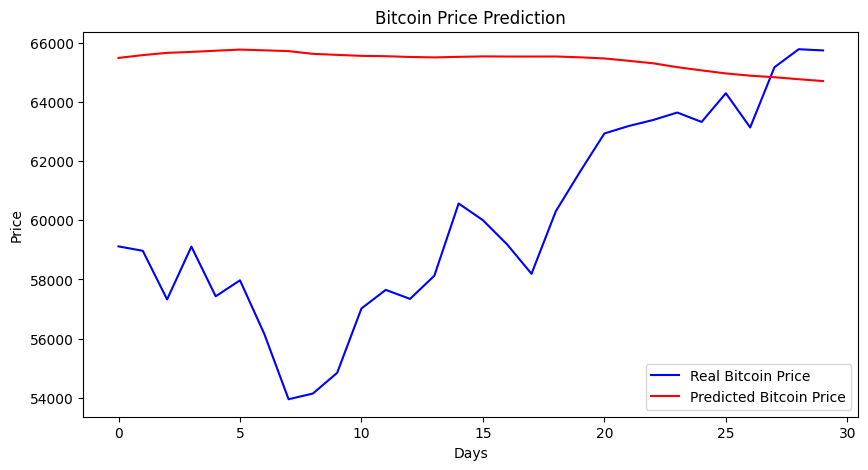

In [7]:
# Comparando previsões com os dados reais
real_data = data[-30:]  # Use os últimos 30 dias de dados reais
rmse = np.sqrt(mean_squared_error(real_data, predictions))

print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(real_data, predictions)
print(f'Mean Absolute Error: {mae}')

# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.plot(real_data, color='blue', label='Real Bitcoin Price')
plt.plot(predictions, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
# Função para criar janelas de tempo
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Passo 1: Coletar os dados do Bitcoin
data = yf.download('BTC-USD', start='2017-01-01', end='2024-09-30')
data = data['Close'].values.reshape(-1, 1)  # Usando apenas o preço de fechamento

# Passo 2: Normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Passo 3: Criar janelas de tempo com 90 dias
time_step = 90  # Aumentando o tamanho da janela
X, y = create_dataset(scaled_data, time_step)

# Reshape dos dados para o formato [amostras, passos do tempo, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Passo 4: Divisão em treino e teste
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:1]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Passo 5: Criar o modelo LSTM bidirecional com mais camadas
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))  # Aumentando o dropout para evitar overfitting
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.3))
model.add(Dense(1))

# Passo 6: Compilar o modelo com uma taxa de aprendizado ajustada
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Passo 7: Treinar o modelo
model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

# Passo 8: Fazer previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Passo 9: Inverter a normalização para comparar com os dados reais
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Passo 10: Avaliação do desempenho com métricas de erro
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))

train_mae = mean_absolute_error(y_train_inv, train_predict)
test_mae = mean_absolute_error(y_test_inv, test_predict)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

# Passo 11: Plotar os resultados
plt.figure(figsize=(14, 5))
plt.plot(y_test_inv, color='blue', label='Real Bitcoin Price')
plt.plot(test_predict, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
C:\Users\Inteli\Inteli 2024\M7\m7-activities\venv\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'Adam' is not defined